# Recap of last workshop
* Exploratory data analysis, curse of dimensionality, data visualization techniques
* Intro. to multicollinearity, idea of feature engineering
* Power of linear regression -- has potential outperform complex models like neural networks

# Learning objectives for today
This workshop will be more focused on _concepts_ and _applications_ as opposed to _coding implementations_, but there's a fair bit of both. This workshop will throw alot of concepts at you, so I'll try my best to explain the intuition behind them.

As a side note, feel free to chat with me after the workshop if you want some pointers on where to start if you're new to machine learning, or want advice on getting a data-science type coop :)

* Linear regression -- a bit of math
    * Ordinary Least Squares (OLS) approach, Gradient Descent approach
    * $R^2$ and RMSE
    * Intro. to regularization -- Ridge and LASSO 
* Approaches for dealing with multicollinearity
    * Correlation matrices, PCA (applications)
* Intro. to time series analysis
    * Stationarity, dickey-fuller test, ACF, PACF, AR models

# Linear regression

## Background
In linear regression, we model the relationship between a dependent variable (Y), and one or more explanatory/indepedent variables (X). The goal of the model is the fit a straight line to a set of points. 

If we have one explanatory variable, we have a case of __simple linear regression__. We can define this relationship as follows: 

$$
Y = β_0 + β_1x
$$

where β<sub>1</sub> is the _slope_ or _coefficient_ and β<sub>0</sub> is the _y-intercept_ or _bias coefficient_. 

If we have more than one explanatory variable, we have a case of __multiple linear regression__. Our input variable X will have _n_ features, where _n_ ∈ [2, $\infty$). We can define this relationship as follows:

$$
Y = β_0 + β_1x_1 + β_2x_2 + ... + β_nx_n
$$

Another way of thinking about multiple linear regression (lin alg):

$$
Y = β_0x_0 + β_1x_1 + β_2x_2 + ... + β_nx_n
$$

where $x_0 = 1$

Then:
$$
Y = β^TX
$$

where $β = [β_0 + β_1 + β_2 + ... + β_n]^T$ and $X = [x_0 + x_1 + x_2 + ... + x_n]^T$

More formally, we can call Y the _hypothesis function_ and denote:

$$ 
Y = h_β(x) = β^TX
$$

> __Pro-tip__: If you want a deeper understanding of the underlying mathematics, and want to explore other supervised/unsupervised algorithms in depth, I __highly__ recommend the Andrew Ng's Stanford Grad School lectures (the Coursera course is decent too): https://www.youtube.com/watch?v=UzxYlbK2c7E&list=PLA89DCFA6ADACE599

Some __important assumptions__ with a linear regression models are:
1. Continuous dependent variable (e.g. weight, time, length)
2. Regression model is linear in parameters (e.g. Linear?   $ Y = a + B_1x_1 + B_2x_2^2 $) Linear
3. No autocorrelation of residuals. (In other words, all observations are independent)
4. No perfect multicollinearity.

The main problem with linear regression is trying to find coefficients for our model that minimize our error function. How do we go about doing this?
Two of the approaches I'll discuss today are the Ordinary Least Squares (OLS) Method, and the Gradient Descent approach. I'll use a case of simple linear regression to describe the OLS method, and a case of multiple linear regression to explain the gradient descent approach.

## Ordinary Least Squares (OLS) Method
As previously said, the main goal is to minimize the error of our model. As shown in the visualization below, we can do this by finding the line that reduces the sum of the errors (distance between line and data point). By convention, we square the sume of the errors so that our error is always positive.

![](reg_error.png)

We can mathematically express the total error as:

$$
Error = \sum_{i=1}^m d_i^2
$$

where _d_<sub>i</sub> is the distance between the line and the $ith$ point, and we sum this distance over _m_ data points.

To minimize our error, we get the following equations to estimate the slope and intercept:

Denoting $\overline{y}$ and $\overline{x}$ as the mean values of X and Y, respectively, we get:

$$
Y = β_0 + β_1x
$$

$$
β_1 = \frac{\sum_{i=1}^m (x_i - \overline{x})(y_i - \overline{y})}{\sum_{i=1}^m (x_i - \overline{x})^2}
$$

$$
β_0 = \overline{y} - β_1\overline{x}
$$

## Measuring how good our model is

There are a variety of metrics we can use to test how well our line of best fit models the data. The two that we'll talk about today are the __Coefficient of Determination ($R^2$)__, and the __Root Mean Squared Error__.

## Coefficient of Correlation

First off, what is correlation? 

We denote correlation by _r_, and call it the __Coefficient of Correlation__. The correlation coefficient of two series __X__ and __Y__ is defined as:
$$
r = \frac{Cov(X,Y)}{std(X)std(Y)} 
$$

where _Cov_ is the covariance and _std_ is the standard deviation.

What does this actually mean? To understand this, we need to understand covariance.

## Correlation vs. Covariance
Covariance is a measure of how much of the variance in one variable is explained in the variance of another variable. Correlation is just a normalized form a covariance. Let's do an example to illustrate why we need correlation.

In [149]:
import pandas as pd # Importing and managing our data
import numpy as np  # Nice linear algebra functions
import os
import matplotlib.pyplot as plt  # For making visualaizations

a = np.random.rand(50)
b = 2 * a + np.random.normal(0, 0.1, 50)

print np.cov(a,b)[0, 1]

0.154921118617


Correlation uses information about the variance of X and Y to normalize this metric. Once we've normalized the metric to the -1 to 1 scale, we can make meaningful statements and compare correlations. 

This is done as follows:

$$
r = \frac{Cov(X,Y)}{std(X)std(Y)} 
$$

$$
r = \frac{Cov(X,Y)}{\sqrt{var(X)}\sqrt{var(Y)}}
$$

$$
r = \frac{Cov(X,Y)}{\sqrt{Cov(X,X)}\sqrt{Cov(Y,Y)}}
$$

The Coefficient of Correlation takes on values from -1 to 1, and is _simply a measure of how well two variables trend linearly_. 

* Case 1: _r_ = 0. No correlation.
* Case 2: _r_ = -1. Perfect negative correlation -- inverse relationship.
* Case 3: _r_ = +1. Perfect positive correlation -- direct relationship.
* Case 4: _r_ ∈ (-1, 0) U (0, 1). What is a "good" correlation



## Coefficient of Determination
The __Coefficient of Determination__ is the the _r_ value squared, hence we denote it $R^2$. We define $R^2$ as the _proportion of variance in the dependent variable that is predictable from the indepedent variable_.

A more formal mathemtical definition of $R^2$ is as follows. Let's define $\widehat{y_i}$ to be the $ith$ predicted output value. Then the $R^2$ score is:

$$ 
SumOfSquares = \sum_{i=1}^m(y_i - \overline{y})^2 
$$

$$ 
ResidualSumOfSquares = \sum_{i=1}^m(y_i - \widehat{y_i})^2 
$$

$$ 
R^2 = 1 - \frac{ResidualSumOfSquares}{SumOfSquares} 
$$

## RMSE
A more statistically rigorous metric we can use to test our linear model is the Root Mean Squared Error (RMSE). The RMSE is simply the _sum of all errors divided by the # of values_. It's a nice measure of how much error there is between two datasets. This is expressed as follows:

$$
RMSE = \sqrt{\sum_{i=1}^m\frac{(\widehat{y_i} - y_i)^2}{m}}
$$

Let's apply all these concepts and implement OLS by using a simple dataset where we have # of hours studied and test scores achieved as columns. We want to predict the test scores.

We'll start off by importing some standard libraries (most were imported above).

In [150]:
import os
# Tell Jupyter Notebook to display our graphs automatically
%matplotlib inline 
import warnings
warnings.filterwarnings('ignore')

Next we load our dataset.

In [151]:
# Reading Data
data = pd.read_csv('hours_marks.csv')
X = data['Hours'].values
Y = data['Marks'].values
print(data.shape)
data.head()

(100, 2)


,Hours,Marks
0,32.502345,31.707006
1,53.426804,68.777596
2,61.530358,62.562382
3,47.475640,71.546632
4,59.813208,87.230925


In [152]:
# total num of data points
m = len(X)

# get mean of X and Y
mean_x = np.mean(X)
mean_y = np.mean(Y)

In [153]:
def OLS(X, Y):
    # Solve for β0 and β1 
    numer = 0
    denom = 0
    
    # iterate over our number of data points
    for i in range(m):
        numer += (X[i] - mean_x) * (Y[i] - mean_y)
        denom += (X[i] - mean_x) ** 2
    
    beta1 = numer / denom
    beta0 = mean_y - (beta1 * mean_x)
    
    # Print coefficients
    print(beta1, beta0)
    
OLS(X, Y)

(1.3224310226878686, 7.9910209857344228)


In [154]:
# defining coefficients outside function to reuse later...
beta1 = 1.3224310226878686
beta0 = 7.9910209857344228

Since we have our coefficients, we can express our linear model as:

$ Marks = 7.9910209857344228 + 1.3224310226878686*HoursStudied $

We can also visualize our model:

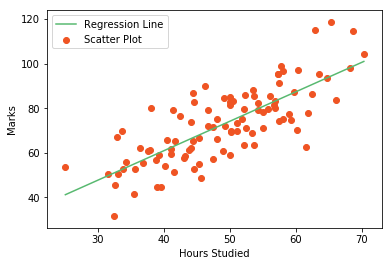

In [155]:
def plot_sim_lin_reg():
    max_x = np.max(X) 
    min_x = np.min(X) 

    # Calculating line values x and y
    x = np.linspace(min_x, max_x, 1000)
    y = beta0 + beta1 * x

    # Ploting Line
    plt.plot(x, y, color='#58b970', label='Regression Line')
    # Ploting Scatter Points
    plt.scatter(X, Y, c='#ef5423', label='Scatter Plot')

    plt.xlabel('Hours Studied')
    plt.ylabel('Marks')
    plt.legend()
    plt.show()
plot_sim_lin_reg()

Let's also quickly take a look at the $R^2$ value for # hours studied and marks. Then we'll calculate the RMSE of our model.

In [156]:
def correlation_coeff():
    # initialize counts
    sum_squares = 0
    res_sum_squares = 0
    
    # iterate over number of data points
    for i in range(m):
        y_pred = beta0 + beta1 * X[i]
        
        # append to count
        sum_squares += (Y[i] - mean_y) ** 2
        res_sum_squares += (Y[i] - y_pred) ** 2
        
    r2 = 1 - (res_sum_squares/sum_squares)
    print r2
    
correlation_coeff()

0.598655791566


So our $R^2$ is around 0.60. This means that for the most part, the more you study the higher your marks are, and vice versa. Moral of the story: study ... unless you're that outlier. 

Now let's calculate the RMSE of our model:

In [157]:
def rmse():
    # initialize counts
    rmse = 0
    
    # iterate over number of data points
    for i in range(m):
        y_pred = beta0 + beta1 * X[i]
        
        # append to count
        rmse += (Y[i] - y_pred) ** 2
        
    rmse = np.sqrt(rmse/m)
    print rmse
    
rmse()

10.5003515869


So we found that the RMSE is around 10.5. The closer the RMSE is to 0, the closer our predicted values are to our observed values, so this number seems reasonable.

> __Pro tip__: To deeply understand and __remember__ these concepts, practice implementing models like simple linear regression from scratch. Learning this way is invaluable. It's not uncommon to be asked in data science interviews to implement X algorithm from scratch.

## Gradient Descent Approach

Recall the general form of multiple linear regression:

$$
Y = β^TX
$$

where $β = [β_0 + β_1 + β_2 + ... + β_n]^T$ and $X = [x_0 + x_1 + x_2 + ... + x_n]^T$

More formally, we can call Y the _hypothesis function_ and denote:

$$ 
Y = h_β(x) = β^TX
$$

Gradient descent is an optimization algorithm. What does it optimize? Our cost function. Let's define one used for regression models, called the __mean squared error__. By convention, we'll denote this function as $J(β)$:

$$
MSE = J(β) = \frac{1}{2m}\sum_{i=1}^m(h_β(x^i) - y^i)^2
$$

The main idea here is to minimize our J(β) function to approximate the "best" β. We do this with gradient descent. 2 of the steps in the process:

1. Initialize β_0 + β_1 + β_2 + ... + β_n to 0 (any value).

2. Iteratively update β until it converges using:

$$
β_j := β_j - \alpha\frac{\partial}{\partial β_j}J(β)
$$

$$
β_j := β_j - \alpha\frac{1}{m}\sum_{i=1}^m(h_β(x^i) - y^i)x_j^i
$$

where $\alpha$ is the learning rate, and $\frac{\partial}{\partial β_j}$ is the partial derivative of our cost function with respect to $β_j$. Note also that $x^i$ and $y^i$ are the ith x and y training example (had a bit of trouble with notation in creating this jupyter notebook).

$\alpha$ basically determines how large of a step we take when we're trying to minimize our cost function. If it's too small, there will be slow convergence (large # of epochs). General idea: for sufficiently small $\alpha$,  J(β) should decrease on every iteration.

What defines "convergence"? Can declare convergence if cost function J(β) decreases by less than $10^-3$ in one iteration.

> __Pro-tip__: Gradient descent is one of the funadmental backbone algorithms behind neural networks (updating neuron weights with backpropagation). If you want a gentle introduction to how neural networks work and how backprop is derived I __highly__ recommend the following resource: http://neuralnetworksanddeeplearning.com/

![Gradient Descent](grad_desc.jpg)

Here's a quick visualization of what our line of best fit could look like after each epoch. Notice how as we iteratively update $β_j$, our line of best fit better approximates the dataset: 

![](grad_des_lin_reg.gif)

> __Exercise for you__: As I was writing this notebook I realized since we're covering quite a bit of content I wouldn't have enough time to step through a gradient descent implementation. So I'll leave it up to you guys to try implementing a regression w/ gradient descent. There are tons of great datasets online, like this one: https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data

> Try doing some feature engineering, and pick a couple features to regress against predicting the sale price of a house. If you're having trouble coming up with an implementation, here's a fantastic tutorial: https://spin.atomicobject.com/2014/06/24/gradient-descent-linear-regression/

## Intro. to Regularization

Sometimes it might be tempting, or even necessary to have a bunch of explanatory variables in our regression to improve the training accuracy of our model (by taking into account more parameters). However, most of the time, this leads to __overfitting__. Overfitting basically means the model is capturing the noise in the data instead of the signal (think back to the bias-variance tradeoff: overfitting = low bias, high variance). 

We can implement techniques like cross-validation (which was covered in the previous workshop), and __regularization__. This is a critical concept in models like neural networks. In a regularized machine learning model, we add another term to our cost function that we also want to minimize.

## Ridge Regression

Linear regression model that's penalized with L2-norm (sum of squared coefficients). Has effect of shrinking the coefficient values, resulting in coefficients with minor contributions to the response (dependent variable) being closer to zero.

Let's illustrate this with one of the basic cost/loss functions in regression: Least Squares (synonymous with residual sum of squares)

$$ 
ResidualSumOfSquares = \sum_{i=1}^m(y_i - \widehat{y_i})^2 
$$

In ridge regression we simple add the L2 norm to our cost function:

$$
CostFunction = \sum_{i=1}^m(y_i - \widehat{y_i})^2  + \lambda\sum_{j=1}^n β_j^2
$$

That L2-norm basically punishes our cost function for high values of β. By doing this we minimize β coefficients as much as possible. $\lambda$ is a scalar parameter that's learned with cross validation. An important distinction between Ridge and Lasso regression is that in ridge regression we minimize our β coefficients as much as possible, but we __don't__ force them to 0 -- so we don't get rid of irrelevant features but rather, we minimize their impact on the overall model.

## Lasso Regression
LASSO = Least Absolute Shrinkage and Selection Operator

Linear regression model that's penalized with L1-norm (sum of absolute coefficients). The cost function for LASSO is slightly different than ridge regression in that regard:

$$
CostFunction = \sum_{i=1}^m(y_i - \widehat{y_i})^2  + \lambda\sum_{j=1}^n |β_j|
$$

Thus, one of the benefits of Lasso regression is that it sets β coefficients of irrelevant predictors to 0. This means you'll be left with meaningful predictors. 

## Dealing with Muticollinearity

We typically want the features we use in our regression (i.e. explanatory variables) to be lowly correlated. As we discussed in the last workshop, we briefly discussed the concept of __multicollinearity__. __Collinearity__ is when we have 2 explanatory variables, say $x_1$ and $x_2$ that have some non-zero correlation. Thus __multi__collinearity occurs when we have >2 explanatory variables that are inter-correlated. Recall one of the major assumptions of linear regression -- _no perfect multicollinearity_! Similar to breaking down the concept of $R^2$ on a case-by-case basis, we can do the same with multicollinearity:

* Case 1: Perfect Multicollinearity. This means that one explanatory variable is a linear combination of other explanatory variables. (E.g. Two measures of an identical variable -- mean score and total score of a scale, etc.) 
* Case 2: _Almost_ Perfect Collinearity. Correlation between 2 variables is very close to 1.
* Case 3: Multicollinearity. One explanatory variable can be linearly predicted by other explanatory variables with decent accuracy.

Multicollinearity doesn't actually affect the performance of our regression model or statistics of the model (e.g. p-values or statistically signficant predictors, $R^2$, etc.). However, it _does_ pose problems if you want to figure out what the effects of individual explanatory variables are. So how can we tackle this issue?


## Correlation Matrices

One approach I like to take when I'm developing a regression model and have come up with some explanatory variables (that I think have predictive power), is to construct a correlation matrix. Let's come up with one for the Housing Price dataset:



In [158]:
housing_df = pd.read_csv("housing_price_dataset.csv")

# very useful for quick stats on dataset
print(housing_df.describe())


                Id   MSSubClass  LotFrontage        LotArea  OverallQual  \
count  1460.000000  1460.000000  1201.000000    1460.000000  1460.000000   
mean    730.500000    56.897260    70.049958   10516.828082     6.099315   
std     421.610009    42.300571    24.284752    9981.264932     1.382997   
min       1.000000    20.000000    21.000000    1300.000000     1.000000   
25%     365.750000    20.000000    59.000000    7553.500000     5.000000   
50%     730.500000    50.000000    69.000000    9478.500000     6.000000   
75%    1095.250000    70.000000    80.000000   11601.500000     7.000000   
max    1460.000000   190.000000   313.000000  215245.000000    10.000000   

       OverallCond    YearBuilt  YearRemodAdd   MasVnrArea   BsmtFinSF1  \
count  1460.000000  1460.000000   1460.000000  1452.000000  1460.000000   
mean      5.575342  1971.267808   1984.865753   103.685262   443.639726   
std       1.112799    30.202904     20.645407   181.066207   456.098091   
min       1.000

In [159]:
# correlation matrix of all features
print(housing_df.corr())

                     Id  MSSubClass  LotFrontage   LotArea  OverallQual  \
Id             1.000000    0.011156    -0.010601 -0.033226    -0.028365   
MSSubClass     0.011156    1.000000    -0.386347 -0.139781     0.032628   
LotFrontage   -0.010601   -0.386347     1.000000  0.426095     0.251646   
LotArea       -0.033226   -0.139781     0.426095  1.000000     0.105806   
OverallQual   -0.028365    0.032628     0.251646  0.105806     1.000000   
OverallCond    0.012609   -0.059316    -0.059213 -0.005636    -0.091932   
YearBuilt     -0.012713    0.027850     0.123349  0.014228     0.572323   
YearRemodAdd  -0.021998    0.040581     0.088866  0.013788     0.550684   
MasVnrArea    -0.050298    0.022936     0.193458  0.104160     0.411876   
BsmtFinSF1    -0.005024   -0.069836     0.233633  0.214103     0.239666   
BsmtFinSF2    -0.005968   -0.065649     0.049900  0.111170    -0.059119   
BsmtUnfSF     -0.007940   -0.140759     0.132644 -0.002618     0.308159   
TotalBsmtSF   -0.015415  

The main problem with this approach is that we don't know what constitutes a "high" correlation? 0.6? 0.8? 0.9? In other words, it's up to us to define what correlation we think is high enough. Sometimes it's fine to just say that since explanatory variables $x_1$ and $x_2$ have a correlation of 0.7, we can get rid of $x_2$ because the variance between the two variables is similar enough we only need one in our regression. 

Let's look at more statistically rigorous approaches to dealing with multicollinearity... 

## Principal Component Analysis (PCA)

PCA is a technique for reducing the dimensionality of a dataset. Dimensionality reduction basically means reducing our data into it's basic components - getting rid of the unnecessary parts.

The major goal of PCA is to detect correlations between variables. If strong correlations exist, then the data's dimensionality can be reduced (because there will be high variance between the two variables, meaning that eliminating one of them will still allow us to retain all the important information we need). Mathematically, we're basically finding the directions of maximum variance in our data and then projecting our high-dimensionality data onto a lower-dimension subspace. 

Instead of diving into the math behind PCA (I've linked some tutorials below that do this nicely), let's talk about some applications of dimensionality reduction:

* Word2Vec: Given a large text corpus as input, we want to predict certain words ("target" words) in our dataset based on surrounding words ("context" words). Main goal of algorithm: capture semantically-similar relationships with words, map these relationships on a vector-space! 

E.g. 'The dog was elated and laughed with a big smile.' Target word: 'elated'. Context words: everything else.

![attachment:word2vec.png](word2vec.png)

> __Protip:__ If you haven't taken linear algebra don't worry too much about the math behind PCA, just try to understand the high-level concept being taught here -- we're eliminating multicollinearity by systematically selecting a subset of our features to eliminate redundant explanatory variables.

> Light primer on PCA: https://georgemdallas.wordpress.com/2013/10/30/principal-component-analysis-4-dummies-eigenvectors-eigenvalues-and-dimension-reduction/

> Some cool visualizations of PCA: http://setosa.io/ev/principal-component-analysis/

> For those more interestested in the math behind PCA, check this out: https://github.com/llSourcell/Dimensionality_Reduction/blob/master/principal_component_analysis.ipynb


## Intro. to Time Series Analysis

_Motivation_: Take any sector (financial, industrial, etc.), and you'll find countless sources of time-series data. For example, let's consider the financial sector. Stock pricing data is time stamped to the second. High frequency traders analyze this data to try and arbitrage $$. Time series analysis is a skillset that very data scientist should have in their arsenal.

A time series is a collection of data points collected at __constant time intervals__. This entices the question -- how is a time series different than any other regression problem?

1. It's __time dependent__. This violates one of our assumptions of linear regression (that observations are independent).
2. Sometimes __seasonality trends__ exist in time series (variations that occurs in certain time frames). 

Because of these properties, we can't just throw a linear regression model at our time series. Hence the inception of time series analysis.

## Stationarity

A time series is __stationary__ if its statistical properties (e.g. mean, variance, etc.) stay __constant over time__.

A more rigorous definition is as follows. A time series is stationary iff:

1. It has a constant mean
2. It has a constant variance
3. It has an autocovariance that doesn't depend on time.

Why does stationarity matter?

The autoregressive models we'll use to model our time series assume our time series is stationary. Stationarity makes our models easier to implement as well.

One statistical test we can use to test the stationarity of our time series is called the __Dickey-Fuller Test__. This test spits out a test statistic and some critical values for different confidence intervals. If the test statistic is less than the critical value, then we can reject the null hypothesis and say the time series is stationary.

> __Protip:__ If you didn't understand the above paragraph: https://en.wikipedia.org/wiki/P-value

Before we dive into more of the theory let's play around with a time series dataset.

In [160]:
from pandas import Series
from pandas import read_csv
series = read_csv('high_school_class_size.csv', header=0, parse_dates=[0], index_col=0, squeeze=True)
print(series.head())

Date
1959-01-01    112.0
1959-01-02    118.0
1959-01-03    132.0
1959-01-04    129.0
1959-01-05    121.0
Name: students, dtype: float64


Some useful functions:

In [161]:
# get # observations of data
print(series.size)

# simple stats on time series
print(series.describe())

192
count    144.000000
mean     280.298611
std      119.966317
min      104.000000
25%      180.000000
50%      265.500000
75%      360.500000
max      622.000000
Name: students, dtype: float64


Let's plot our timeseries now. 

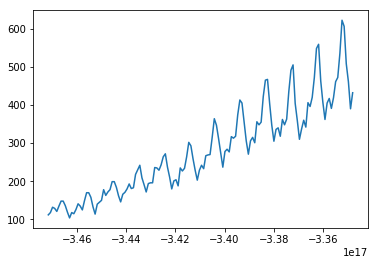

In [162]:
series = Series.from_csv('high_school_class_size.csv', header=0)
plt.plot(series)
plt.show()

Notice the increasing trend in the time series. It's obvious the above time series isn't stationarity (mean clearly increases over time, variance isn't constant). Sometimes, however, it isn't very clear whether a time series is stationary.

One very useful way to check stationarity (besides the Dickey-Fuller test), is to plot rolling statistics (rolling = over time. For example, a moving average, commonly used in technical analysis of stocks, is a rolling statistic).

Let's plot the rolling stats for our timeseries:

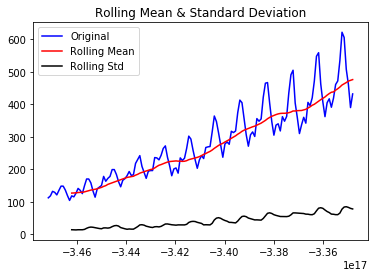

In [163]:
def plot_rolling_stats(timeseries):
    #Determing rolling statistics
    rolmean = pd.rolling_mean(timeseries, window=12)
    rolstd = pd.rolling_std(timeseries, window=12)

    #Plot rolling statistics:
    orig = plt.plot(timeseries, color='blue',label='Original')
    mean = plt.plot(rolmean, color='red', label='Rolling Mean')
    std = plt.plot(rolstd, color='black', label = 'Rolling Std')
    plt.legend(loc='best')
    plt.title('Rolling Mean & Standard Deviation')
    plt.show(block=False)

plot_rolling_stats(series)

When you're dealing with real world data, 99% of the time your time series won't be stationary. So how do we make it stationary?

Well, we can break down the causes of non-stationarity into trend (varying mean over time), and seasonality (discussed above). So if we can estimate these two factors and remove them from our time series, our time series will be stationary.

Some techniques to elimating trend include:
1. Log transformations (penalize large values)
2. Moving average (smooth out fluctuations in data) + other transformations
3. Differencing (for each time step _t_, take the value at _t+1_ and subtract the two values)

Usually we can combine some of these techniques in making our data stationary.

Let's illustrate the techniques now:

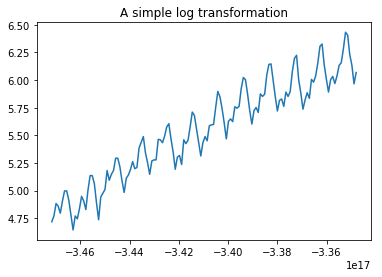

In [164]:
# 1. Log Transformation
# Notice the y value scale!!! It's much lower now...
ts_log = np.log(series)
plt.title('A simple log transformation')
plt.plot(ts_log)

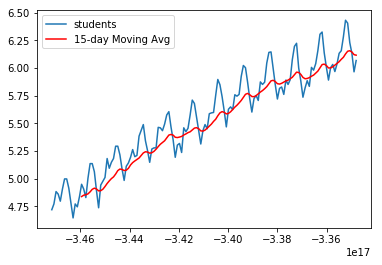

In [165]:
# taking a moving average "smoothes" out the data
# here we take an average every 15 days in our data
moving_avg = pd.rolling_mean(ts_log,15)
plt.plot(ts_log)
plt.plot(moving_avg, color='red', label='15-day Moving Avg')
plt.legend(loc='best')

In [166]:
# One transformation we can apply is to take the difference of the log and moving avg functions
# Note how since we took a 15-day moving avg, the first 15 days of our new function will be NaN
ts_log_moving_avg_diff = ts_log - moving_avg
ts_log_moving_avg_diff.head(20)

Date
1959-01-01         NaN
1959-01-02         NaN
1959-01-03         NaN
1959-01-04         NaN
1959-01-05         NaN
1959-01-06         NaN
1959-01-07         NaN
1959-01-08         NaN
1959-01-09         NaN
1959-01-10         NaN
1959-01-11         NaN
1959-01-12         NaN
1959-01-13         NaN
1959-01-14         NaN
1959-01-15    0.111152
1959-01-16    0.055215
1959-01-17   -0.025588
1959-01-18    0.141969
1959-01-19    0.255422
1959-01-20    0.232755
Name: students, dtype: float64

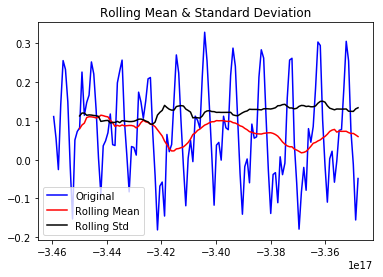

In [167]:
# Let's drop those values and plot our new timeseries
ts_log_moving_avg_diff.dropna(inplace=True)
test_stationarity(ts_log_moving_avg_diff)

Notice how the data is now stationary (rolling mean and std. are essentially constant over time). We can test this more rigorously with the dickey-fuller test using the statsmodels library, but I'll leave that as an exercise for you. I'll also illustrate differencing:

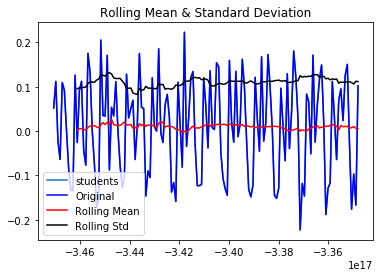

In [168]:
ts_log_diff = ts_log - ts_log.shift()
plt.plot(ts_log_diff)
# we have to drop one NaN value because after differencing, we'll have one less datapoint
ts_log_diff.dropna(inplace=True)
test_stationarity(ts_log_diff)

Differencing is actually the most commonly used method of making a time series stationary. Notice how the rolling mean and std. have significantly less fluctuations (compared to above).

## Forecasting Time Series Datasets

Normally the time series datasets you'll encounter on-the-job _aren't_ __strictly stationary__, where there's no dependence among values. In other words, there will usually be depedence among values in our time series. 

There are a variety forecasting models we can use to predict our timeseries, and we call them __autoregressive models__. An autoregressive model is when a value from a time series is regressed on previous values from that same time series:

$$
y_t = β_0 + β_1y(t-1)
$$


The main model I'll talk about today is the __ARIMA (Autoregressive Integrated Moving Average)__. It sounds complicated and all, but in reality it's just a fancy form of linear regression were we have 3 predictors:

1. __The number of AR (Auto-Regressive) terms (p)__ : This is just the # of lags of the dependent variable. 

E.g. If p = 5, then predictors for x(t) will be x(t-1), x(t-2), ... , x(t-5)


2. __The number of MA (Moving Average) terms (q)__: MA terms are lagged forecast errors in our prediction equation. Let e(i) denote the difference between the moving average and the actual value at the ith timestamp, then:

E.g. If q = 5, then predictors for x(t) will be e(t-1), e(t-2), ... , e(t-5)


3. __The number of differences (d)__: If d = 1, then we're taking 1 difference (for every  time t we subtract t and t-1).

So we can denote our prediction function as ARIMA(p, d, q).

## Finding (p, d, q): PACF and ACF
The (d) parameter is up to us, so we'll just let d = 1 for this example. How do we determine p and q?

We use plots called the __Partial Auto-Correlation Function (PACF)__ and the __Auto-Correlation Function (ACF)__ to determine p and q.

The __ACF__ is simply a measure of the correlation between the time series with a lagged version of itself. For example, at lag 10, the ACF would compare the series at instants t1 with t(1-10), t2 with t(2-10), etc. (Sorry for the bad subscripting).

The __PACF__ measures the correlation between the time series with a lagged version of itself __after__ elimating variations already explained at previous timestamps. (Don't worry too much about what this means).

Let's try to implement an ARIMA model for our timeseries:

Text(0.5,1,u'Autocorrelation Function')

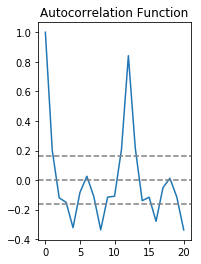

In [169]:
#ACF and PACF plots:
from statsmodels.tsa.stattools import acf, pacf

lag_acf = acf(ts_log_diff, nlags=20)
lag_pacf = pacf(ts_log_diff, nlags=20, method='ols')

#Plot ACF: 
plt.subplot(121) 
plt.plot(lag_acf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Autocorrelation Function')

The two dotted lines on either side of 0 are the confidence intervals. 

We look the ACF to determine q. Specifically, the lag value where the ACF crosses the upper confidence for the first time. This occurs at q= 2.

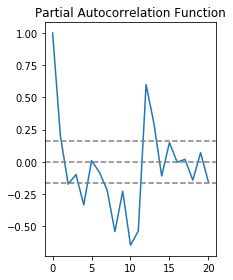

In [170]:
#Plot PACF:
plt.subplot(122)
plt.plot(lag_pacf)
plt.axhline(y=0,linestyle='--',color='gray')
plt.axhline(y=-1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.axhline(y=1.96/np.sqrt(len(ts_log_diff)),linestyle='--',color='gray')
plt.title('Partial Autocorrelation Function')
plt.tight_layout()

We look the PACF to determine p. Specifically, the lag value where the PACF crosses the upper confidence for the first time. This occurs at p=2.

So we have p = q = 2. Our model would be ARIMA(2,2,2). The statsmodels library can be used to implement the actual model, but I just wanted to introduce the concept behind ARIMA.

> __Protip:__ Resources on ARIMA models:
https://machinelearningmastery.com/arima-for-time-series-forecasting-with-python/